In [1]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

c:\Users\Anton Wijaya\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv(
    "../../data/eval_results_gpt5_nano.csv",
    sep=";",
    engine="python",
    on_bad_lines="skip"
)

In [3]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [4]:
question_emb = model.encode(df["question"].tolist())
answer_emb = model.encode(df["answer"].tolist())

In [5]:
similarities = [
    cosine_similarity([q], [a])[0][0]
    for q, a in zip(question_emb, answer_emb)
]

In [6]:
df["similarity_score"] = similarities
df[["question", "answer", "similarity_score"]].head(100)

,question,answer,similarity_score
0,Laptop apa yang cocok untuk gaming budget 15 j...,Yang paling cocok memenuhi kriteria Anda (budg...,0.741387
1,"Laptop ringan untuk kuliah, RAM minimal 8GB",Berikut opsi laptop ringan dengan RAM 8GB atau...,0.603049
2,"Saya punya budget 8 juta, laptop apa yang pali...",Rekomendasi paling worth it dengan budget 8 ju...,0.736349
3,Lebih baik pilih laptop dengan SSD 512GB atau ...,"Ya, sebaiknya pilih kapasitas SSD 512GB (atau ...",0.724325
4,Laptop apa yang cocok untuk kerja kantoran ful...,Yang cocok dengan budget maksimal 7 juta adala...,0.594719
...,...,...,...
95,"Kalau saya punya budget 10 juta, sebaiknya pil...","Maaf, datanya belum cukup. Dari konten yang ad...",0.602831
96,Laptop apa yang cocok untuk mahasiswa teknik s...,Berikut rekomendasi berdasar konten yang ada:\...,0.444194
97,Saya ingin laptop yang enak dipakai untuk kons...,Berikut rekomendasi yang sesuai kebutuhan kons...,0.655281
98,Laptop apa yang cocok untuk developer fullstac...,Berikut pilihan yang paling sesuai dengan kebu...,0.660018


In [7]:
THRESHOLD = 0.6

df["predicted_relevant"] = df["similarity_score"] >= THRESHOLD
df["is_relevant"] = (df["similarity_score"] >= 0.6).astype(int)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(df["is_relevant"], df["predicted_relevant"])
print(cm)

print(classification_report(df["is_relevant"], df["predicted_relevant"]))

[[37  0]
 [ 0 63]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        63

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



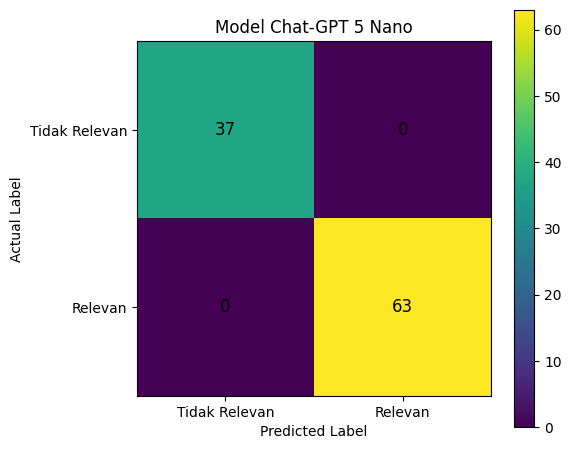

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.imshow(cm)
plt.title("Model Chat-GPT 5 Nano")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.xticks([0,1], ["Tidak Relevan", "Relevan"])
plt.yticks([0,1], ["Tidak Relevan", "Relevan"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=12)

plt.colorbar()
plt.tight_layout()
plt.show()